In [1]:
import pandas as pd 
import numpy as np 

X = pd.read_csv('../Boosts/Datasets/X.csv')
y = pd.read_csv('../Boosts/Datasets/y.csv')

In [2]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=123)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=123)

In [66]:
from keras.models import Sequential
from keras.layers import Dropout, Dense


dnn = Sequential()

dnn.add(Dense(232, input_dim=X_train.shape[1], activation='relu'))
dnn.add(Dropout(0.6))
dnn.add(Dense(116, activation='relu'))
dnn.add(Dropout(0.5))
dnn.add(Dense(58, activation='relu'))
dnn.add(Dropout(0.3))
dnn.add(Dense(29, activation='relu'))
dnn.add(Dense(12, activation='relu'))
dnn.add(Dense(8, activation='relu'))
dnn.add(Dense(1, activation='sigmoid'))

dnn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [67]:
history = dnn.fit(X_train, np.ravel(y_train), epochs=50, batch_size=32,
                  validation_data=(X_val, np.ravel(y_val)), verbose=0)

In [68]:
y_pred = dnn.predict(X_test)

415/415 [==============================] - 1s 2ms/step


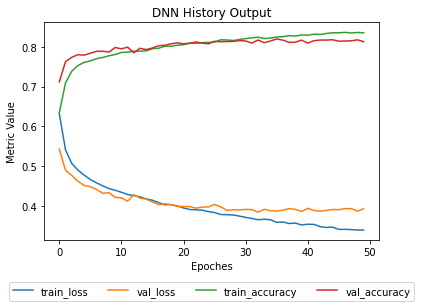

In [69]:
import matplotlib.pyplot as plt

%matplotlib inline

plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')

plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.17), ncol=5)
plt.title("DNN History Output")
plt.xlabel('Epoches')
plt.ylabel('Metric Value')
plt.show()

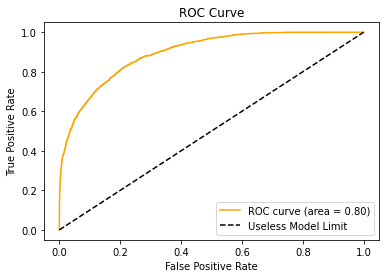

In [70]:
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, roc_auc_score

fpr, tpr, thresholds = roc_curve(np.ravel(y_test), y_pred)
auc = roc_auc_score(np.ravel(y_test), np.round(y_pred))

plt.plot(fpr, tpr, label=f'ROC curve (area = {auc:0.2f})', color='orange')
plt.plot([0, 1], [0, 1], 'k--', label='Useless Model Limit')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")

plt.show()

In [19]:
pd.DataFrame(classification_report(y_test, np.round(y_pred), output_dict=True))

,0,1,accuracy,macro avg,weighted avg
precision,0.868506,0.745544,0.817503,0.807025,0.821019
recall,0.828048,0.800742,0.817503,0.814395,0.817503
f1-score,0.847795,0.772158,0.817503,0.809976,0.818584
support,8136.000000,5119.000000,0.817503,13255.000000,13255.000000


In [33]:
dnn.save('../Boosts/SavedModels/DNN.h5')